In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
import time
from datetime import datetime

from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

87.60293976140852 91.93043289863056
29.09033171234286 -11.408791980029264
-84.54555310347006 -60.564480823533515
-67.02459860735487 92.17295655225786
69.18023764055579 -71.61018102784155
-65.7936964395596 -15.294208203258023
-17.472162696286205 176.30484277974097
79.40839004587724 -96.08415955406305
-39.00436153119543 -110.75310259805264
-41.00111346868219 91.8210184446408
-71.90797760548642 -128.79923305547567
20.55426971246061 -65.10124408299232
46.84287334113782 -18.759762085020355
-47.45919764967187 114.42603729760583
37.246233777299565 -92.63107099990077
-1.6978318570003097 -5.268564265583279
-28.337844246046885 177.4898987498155
43.83442785550983 -118.80223399590014
-43.01366051029821 -47.253666662660805
-84.17870452470211 -22.633417556007828
14.36766522539321 -144.32004636228044
37.66168159680653 -1.5393680042288338
-68.67827118999159 40.77460750307162
0.522168246561904 -1.0966816420065868
-39.40876820430449 23.188721213853512
29.737941067513546 -161.33472755041714
17.1247201592

3.433946689389586 137.0341963618717
-39.72310338913769 18.541868529978018
-81.69040027973654 -6.8943697980079435
-20.642385971637594 112.08610891139483
69.19128631565263 -15.787240821328595
-45.19150984000497 144.52912313725125
64.83238651754647 4.577882477904808
47.67052036974599 48.84702965328978
-53.190754785335926 -83.70040017669815
35.78453548953935 108.28130156065384
17.564465415885664 147.75611378777245
73.46290062994984 -59.092277834323426
-38.641731964075696 99.24639761299721
-69.4315180400443 -45.409344906220895
21.69344419347054 102.89301106551159
-23.489078910589214 174.64845570810684
-20.127764497386863 50.91288143257512
10.78657807885017 -123.36650757776854
2.639023260447118 155.5440746564991
-59.80027730615591 24.43472824232677
49.29857259621309 -30.921110048797516
-64.15334282359468 34.65824838396571
19.851447731666156 25.80964978500009
-76.60873664231127 -127.93115191531386
13.448673332150264 158.36827465313382
-86.37327825588659 47.15956342342207
25.846893663372526 -1

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | tiznit
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | clyde river
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | isangel
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | road town
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | lebanon
Processing Record 14 of Set 1 | tabou
Processing Record 15 of Set 1 | russell
Processing Record 16 of Set 1 | baker city
Processing Record 17 of Set 1 | rocha
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | totana
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | takoradi
Processing Record 22 of Set 1 | plettenberg bay
Processing Record 23 of Set 1 | kapaa
Processing Recor

Processing Record 40 of Set 4 | tilichiki
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | sahuaripa
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | kununurra
Processing Record 45 of Set 4 | lobito
Processing Record 46 of Set 4 | kohtla-jarve
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | inta
Processing Record 50 of Set 4 | kapoeta
Processing Record 1 of Set 5 | mogocha
Processing Record 2 of Set 5 | mawlaik
Processing Record 3 of Set 5 | miyako
Processing Record 4 of Set 5 | yirol
City not found. Skipping...
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | klaksvik
Processing Record 8 of Set 5 | binzhou
Processing Record 9 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 10 of Set 5 | adrar
Processing Record 11 of Set 5 | derzhavinsk
Processing Record 12 of Set 5

Processing Record 28 of Set 8 | payson
Processing Record 29 of Set 8 | somotillo
Processing Record 30 of Set 8 | ous
Processing Record 31 of Set 8 | morros
Processing Record 32 of Set 8 | nogales
Processing Record 33 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | kashan
Processing Record 37 of Set 8 | hanyang
Processing Record 38 of Set 8 | samarai
Processing Record 39 of Set 8 | xinglongshan
Processing Record 40 of Set 8 | longlac
City not found. Skipping...
Processing Record 41 of Set 8 | kamaishi
Processing Record 42 of Set 8 | vardo
Processing Record 43 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 44 of Set 8 | rio gallegos
Processing Record 45 of Set 8 | posse
Processing Record 46 of Set 8 | mayo
Processing Record 47 of Set 8 | srednekolymsk
Processing Record 48 of Set 8 | dzaoudzi
Processing Record 49 of Set 8 | taybad
Processing Record 50 of S

Processing Record 16 of Set 12 | la libertad
Processing Record 17 of Set 12 | kondinskoye
Processing Record 18 of Set 12 | aasiaat
Processing Record 19 of Set 12 | tyukalinsk
Processing Record 20 of Set 12 | bracknell
Processing Record 21 of Set 12 | muskegon
Processing Record 22 of Set 12 | olga
Processing Record 23 of Set 12 | ust-maya
Processing Record 24 of Set 12 | qui nhon
Processing Record 25 of Set 12 | batemans bay
Processing Record 26 of Set 12 | sogdiondon
City not found. Skipping...
Processing Record 27 of Set 12 | orsha
Processing Record 28 of Set 12 | saint-denis
Processing Record 29 of Set 12 | katsuura
Processing Record 30 of Set 12 | azle
Processing Record 31 of Set 12 | sivaki
Processing Record 32 of Set 12 | yuncheng
Processing Record 33 of Set 12 | torre-pacheco
Processing Record 34 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 35 of Set 12 | wonosobo
Processing Record 36 of Set 12 | alice springs
Processing Record 37 of Set 12 | mang

In [7]:
len(city_data)

569

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,28.22,92,82,6.04,RU,2022-06-09 17:44:16
1,Tiznit,29.5833,-9.5000,79.81,46,0,6.98,MA,2022-06-09 17:44:17
2,Ushuaia,-54.8000,-68.3000,37.06,75,40,23.02,AR,2022-06-09 17:40:49
3,Busselton,-33.6500,115.3333,60.33,67,100,14.20,AU,2022-06-09 17:44:17
4,Clyde River,70.4692,-68.5914,32.23,86,100,8.05,CA,2022-06-09 17:39:44
5,Cape Town,-33.9258,18.4232,60.91,77,0,8.05,ZA,2022-06-09 17:43:48
6,Isangel,-19.5500,169.2667,75.47,84,86,5.21,VU,2022-06-09 17:44:18
7,Thompson,55.7435,-97.8558,66.36,42,40,4.61,CA,2022-06-09 17:44:18
8,Rikitea,-23.1203,-134.9692,72.52,56,28,12.50,PF,2022-06-09 17:44:19
9,Road Town,18.4167,-64.6167,87.84,62,40,10.36,VG,2022-06-09 17:40:35


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-06-09 17:44:16,73.5069,80.5464,28.22,92,82,6.04
1,Tiznit,MA,2022-06-09 17:44:17,29.5833,-9.5000,79.81,46,0,6.98
2,Ushuaia,AR,2022-06-09 17:40:49,-54.8000,-68.3000,37.06,75,40,23.02
3,Busselton,AU,2022-06-09 17:44:17,-33.6500,115.3333,60.33,67,100,14.20
4,Clyde River,CA,2022-06-09 17:39:44,70.4692,-68.5914,32.23,86,100,8.05
5,Cape Town,ZA,2022-06-09 17:43:48,-33.9258,18.4232,60.91,77,0,8.05
6,Isangel,VU,2022-06-09 17:44:18,-19.5500,169.2667,75.47,84,86,5.21
7,Thompson,CA,2022-06-09 17:44:18,55.7435,-97.8558,66.36,42,40,4.61
8,Rikitea,PF,2022-06-09 17:44:19,-23.1203,-134.9692,72.52,56,28,12.50
9,Road Town,VG,2022-06-09 17:40:35,18.4167,-64.6167,87.84,62,40,10.36


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

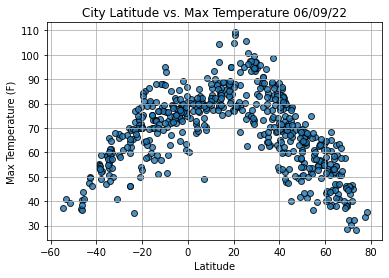

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

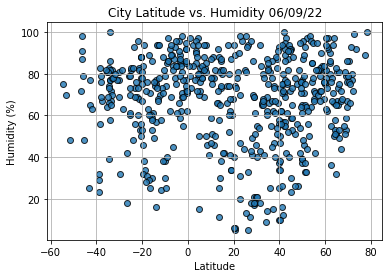

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

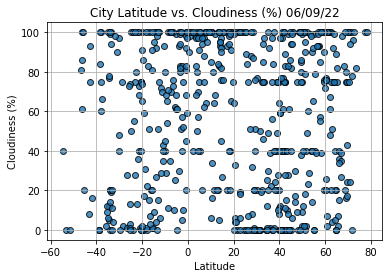

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

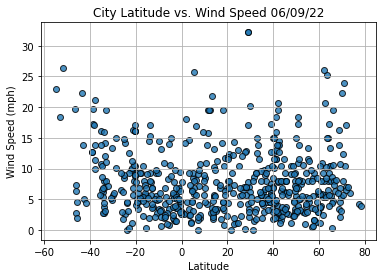

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

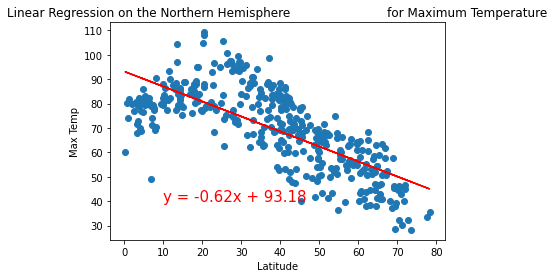

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

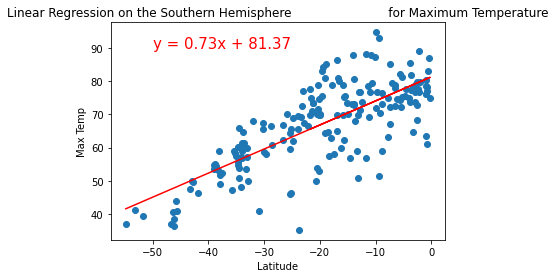

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

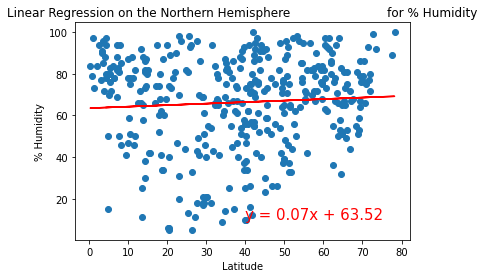

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

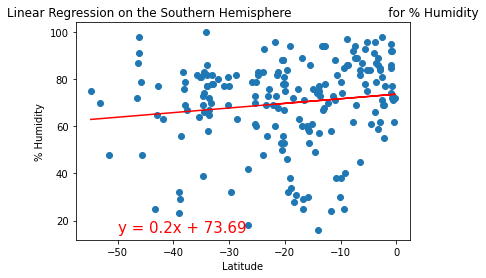

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

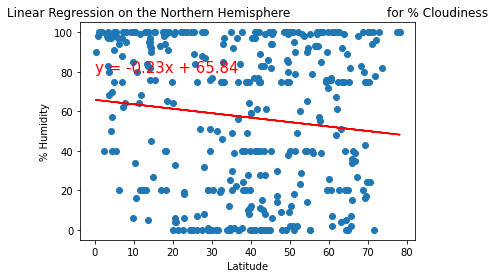

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(0,80))

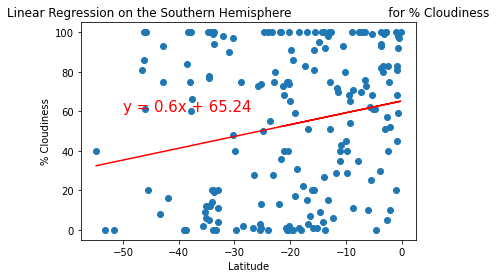

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

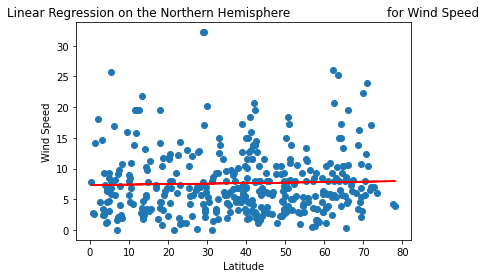

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

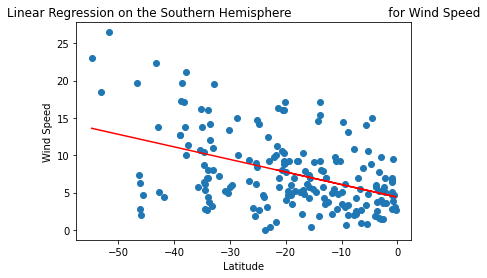

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))